In [3]:
import pandas as pd
import numpy as np

# On this page
 
Object creation

Viewing data

Selection

Missing data

Operations

Merge

Grouping

Reshaping

Time series

Categoricals

Plotting

Importing and exporting data

Gotchas

# Object creation

See https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro

In [6]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)



0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [21]:
dates = pd.date_range("20130101", periods=6)
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [10]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

A         B         C         D
2013-01-01  1.078680  1.549234 -0.202251  1.005984
2013-01-02  0.687142  0.495356 -1.050888  1.708432
2013-01-03 -0.820108  1.788899 -1.778862  0.271860
2013-01-04 -1.549533 -0.232063 -0.932197  0.400815
2013-01-05 -1.410156  0.625108  1.959654 -0.275775
2013-01-06  1.029937 -0.692972 -0.636925  1.026558

In [11]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

In [12]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# Viewing data

https://pandas.pydata.org/docs/user_guide/basics.html#basics

In [13]:
df2.head()

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

In [14]:
df2.head(10)

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   A       4 non-null      float64       
 1   B       4 non-null      datetime64[ns]
 2   C       4 non-null      float32       
 3   D       4 non-null      int32         
 4   E       4 non-null      category      
 5   F       4 non-null      object        
dtypes: category(1), datetime64[ns](1), float32(1), float64(1), int32(1), object(1)
memory usage: 288.0+ bytes


In [17]:
df2.describe()

A                    B    C    D
count  4.0                    4  4.0  4.0
mean   1.0  2013-01-02 00:00:00  1.0  3.0
min    1.0  2013-01-02 00:00:00  1.0  3.0
25%    1.0  2013-01-02 00:00:00  1.0  3.0
50%    1.0  2013-01-02 00:00:00  1.0  3.0
75%    1.0  2013-01-02 00:00:00  1.0  3.0
max    1.0  2013-01-02 00:00:00  1.0  3.0
std    0.0                  NaN  0.0  0.0

In [18]:
df.tail()

A         B         C         D
2013-01-02  0.687142  0.495356 -1.050888  1.708432
2013-01-03 -0.820108  1.788899 -1.778862  0.271860
2013-01-04 -1.549533 -0.232063 -0.932197  0.400815
2013-01-05 -1.410156  0.625108  1.959654 -0.275775
2013-01-06  1.029937 -0.692972 -0.636925  1.026558

In [19]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [20]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [22]:
df.to_numpy()

array([[ 1.07867958,  1.54923442, -0.20225125,  1.00598445],
       [ 0.68714183,  0.49535636, -1.05088817,  1.70843197],
       [-0.82010758,  1.78889877, -1.77886187,  0.27186044],
       [-1.5495329 , -0.2320634 , -0.93219706,  0.40081533],
       [-1.41015607,  0.625108  ,  1.95965404, -0.27577497],
       [ 1.02993684, -0.69297197, -0.63692498,  1.02655783]])

In [24]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [25]:
df.T

2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A    1.078680    0.687142   -0.820108   -1.549533   -1.410156    1.029937
B    1.549234    0.495356    1.788899   -0.232063    0.625108   -0.692972
C   -0.202251   -1.050888   -1.778862   -0.932197    1.959654   -0.636925
D    1.005984    1.708432    0.271860    0.400815   -0.275775    1.026558

In [26]:
df.sort_index(axis=1, ascending=False)

D         C         B         A
2013-01-01  1.005984 -0.202251  1.549234  1.078680
2013-01-02  1.708432 -1.050888  0.495356  0.687142
2013-01-03  0.271860 -1.778862  1.788899 -0.820108
2013-01-04  0.400815 -0.932197 -0.232063 -1.549533
2013-01-05 -0.275775  1.959654  0.625108 -1.410156
2013-01-06  1.026558 -0.636925 -0.692972  1.029937

In [28]:
df.sort_values(by="B")

A         B         C         D
2013-01-06  1.029937 -0.692972 -0.636925  1.026558
2013-01-04 -1.549533 -0.232063 -0.932197  0.400815
2013-01-02  0.687142  0.495356 -1.050888  1.708432
2013-01-05 -1.410156  0.625108  1.959654 -0.275775
2013-01-01  1.078680  1.549234 -0.202251  1.005984
2013-01-03 -0.820108  1.788899 -1.778862  0.271860

# Selection

While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, DataFrame.at(), DataFrame.iat(), DataFrame.loc() and DataFrame.iloc().

See https://pandas.pydata.org/docs/user_guide/indexing.html#indexing

See https://pandas.pydata.org/docs/user_guide/advanced.html#advanced

In [29]:
df["A"] #df.A

2013-01-01    1.078680
2013-01-02    0.687142
2013-01-03   -0.820108
2013-01-04   -1.549533
2013-01-05   -1.410156
2013-01-06    1.029937
Freq: D, Name: A, dtype: float64

In [30]:
df.A

2013-01-01    1.078680
2013-01-02    0.687142
2013-01-03   -0.820108
2013-01-04   -1.549533
2013-01-05   -1.410156
2013-01-06    1.029937
Freq: D, Name: A, dtype: float64

In [31]:
df[0:3]

A         B         C         D
2013-01-01  1.078680  1.549234 -0.202251  1.005984
2013-01-02  0.687142  0.495356 -1.050888  1.708432
2013-01-03 -0.820108  1.788899 -1.778862  0.271860

In [32]:
df["20130102":"20130104"]

A         B         C         D
2013-01-02  0.687142  0.495356 -1.050888  1.708432
2013-01-03 -0.820108  1.788899 -1.778862  0.271860
2013-01-04 -1.549533 -0.232063 -0.932197  0.400815

## Selection by label
See more in Selection by Label using DataFrame.loc() or DataFrame.at().

See https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-label

In [34]:
df.loc[dates[0]]

A    1.078680
B    1.549234
C   -0.202251
D    1.005984
Name: 2013-01-01 00:00:00, dtype: float64

In [35]:
df.loc[:, ["A", "B"]]

A         B
2013-01-01  1.078680  1.549234
2013-01-02  0.687142  0.495356
2013-01-03 -0.820108  1.788899
2013-01-04 -1.549533 -0.232063
2013-01-05 -1.410156  0.625108
2013-01-06  1.029937 -0.692972

In [36]:
df.loc[:,["B","A","C"]]

B         A         C
2013-01-01  1.549234  1.078680 -0.202251
2013-01-02  0.495356  0.687142 -1.050888
2013-01-03  1.788899 -0.820108 -1.778862
2013-01-04 -0.232063 -1.549533 -0.932197
2013-01-05  0.625108 -1.410156  1.959654
2013-01-06 -0.692972  1.029937 -0.636925

In [38]:
df.loc["20130102":"20130104",["A","B"]]

A         B
2013-01-02  0.687142  0.495356
2013-01-03 -0.820108  1.788899
2013-01-04 -1.549533 -0.232063

In [42]:
df.at[dates[0], "A"]

1.0786795768697137

Difference between at and loc ?

loc can take multiple rows and columns as input arguments. . at can only take one row and one column as input arguments.

## Selection by position

https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-integer

In [43]:
df.iloc[3]

A   -1.549533
B   -0.232063
C   -0.932197
D    0.400815
Name: 2013-01-04 00:00:00, dtype: float64

In [45]:
df.iloc[2:4,1:3]

B         C
2013-01-03  1.788899 -1.778862
2013-01-04 -0.232063 -0.932197

In [46]:
df.iloc[[1, 2, 4], [0, 2]]

A         C
2013-01-02  0.687142 -1.050888
2013-01-03 -0.820108 -1.778862
2013-01-05 -1.410156  1.959654

In [47]:
df.iloc[1:3, :]

A         B         C         D
2013-01-02  0.687142  0.495356 -1.050888  1.708432
2013-01-03 -0.820108  1.788899 -1.778862  0.271860

In [48]:
df.iat[1, 1]

0.4953563573284373

## Boolean indexing

In [49]:
df[df["A"]>0]

A         B         C         D
2013-01-01  1.078680  1.549234 -0.202251  1.005984
2013-01-02  0.687142  0.495356 -1.050888  1.708432
2013-01-06  1.029937 -0.692972 -0.636925  1.026558

In [50]:
df[df>0]

A         B         C         D
2013-01-01  1.078680  1.549234       NaN  1.005984
2013-01-02  0.687142  0.495356       NaN  1.708432
2013-01-03       NaN  1.788899       NaN  0.271860
2013-01-04       NaN       NaN       NaN  0.400815
2013-01-05       NaN  0.625108  1.959654       NaN
2013-01-06  1.029937       NaN       NaN  1.026558

In [51]:
df2 = df.copy()

df2["E"] = ["one", "one", "two", "three", "four", "three"]

df2

A         B         C         D      E
2013-01-01  1.078680  1.549234 -0.202251  1.005984    one
2013-01-02  0.687142  0.495356 -1.050888  1.708432    one
2013-01-03 -0.820108  1.788899 -1.778862  0.271860    two
2013-01-04 -1.549533 -0.232063 -0.932197  0.400815  three
2013-01-05 -1.410156  0.625108  1.959654 -0.275775   four
2013-01-06  1.029937 -0.692972 -0.636925  1.026558  three

In [53]:
#Using the isin() method for filtering:
df2[df2["E"].isin(['two','four'])]

A         B         C         D     E
2013-01-03 -0.820108  1.788899 -1.778862  0.271860   two
2013-01-05 -1.410156  0.625108  1.959654 -0.275775  four

## Setting 

Setting a new column automatically aligns the data by the indexes:

In [55]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [56]:
df["F"] = s1

In [57]:
df.at[dates[0], "A"] = 0

In [58]:
df.iat[0, 1] = 0

In [63]:
df.loc[:, "D"] = np.array([5] * len(df))

In [64]:
df

A         B         C    D    F
2013-01-01  0.000000  0.000000 -0.202251  5.0  NaN
2013-01-02  0.687142  0.495356 -1.050888  5.0  1.0
2013-01-03 -0.820108  1.788899 -1.778862  5.0  2.0
2013-01-04 -1.549533 -0.232063 -0.932197  5.0  3.0
2013-01-05 -1.410156  0.625108  1.959654  5.0  4.0
2013-01-06  1.029937 -0.692972 -0.636925  5.0  5.0

In [65]:
df2 = df.copy()

In [66]:
df2[df2 > 0] = -df2

In [67]:
df2

A         B         C    D    F
2013-01-01  0.000000  0.000000 -0.202251 -5.0  NaN
2013-01-02 -0.687142 -0.495356 -1.050888 -5.0 -1.0
2013-01-03 -0.820108 -1.788899 -1.778862 -5.0 -2.0
2013-01-04 -1.549533 -0.232063 -0.932197 -5.0 -3.0
2013-01-05 -1.410156 -0.625108 -1.959654 -5.0 -4.0
2013-01-06 -1.029937 -0.692972 -0.636925 -5.0 -5.0

# Missing data

See https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data


In [70]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1

A         B         C    D    F   E
2013-01-01  0.000000  0.000000 -0.202251  5.0  NaN NaN
2013-01-02  0.687142  0.495356 -1.050888  5.0  1.0 NaN
2013-01-03 -0.820108  1.788899 -1.778862  5.0  2.0 NaN
2013-01-04 -1.549533 -0.232063 -0.932197  5.0  3.0 NaN

In [72]:
df1.loc[dates[0] : dates[1], "E"] = 1

df1

A         B         C    D    F    E
2013-01-01  0.000000  0.000000 -0.202251  5.0  NaN  1.0
2013-01-02  0.687142  0.495356 -1.050888  5.0  1.0  1.0
2013-01-03 -0.820108  1.788899 -1.778862  5.0  2.0  NaN
2013-01-04 -1.549533 -0.232063 -0.932197  5.0  3.0  NaN

In [77]:
df1.dropna(how="any")

# how has any or all argument. 
# "any" removes any row that has nan value. 
#"all" only removes columns where all values are nan

A         B         C    D    F    E
2013-01-02  0.687142  0.495356 -1.050888  5.0  1.0  1.0

In [78]:
df1.fillna(value=5)

A         B         C    D    F    E
2013-01-01  0.000000  0.000000 -0.202251  5.0  5.0  1.0
2013-01-02  0.687142  0.495356 -1.050888  5.0  1.0  1.0
2013-01-03 -0.820108  1.788899 -1.778862  5.0  2.0  5.0
2013-01-04 -1.549533 -0.232063 -0.932197  5.0  3.0  5.0

In [79]:
pd.isna(df1)

A      B      C      D      F      E
2013-01-01  False  False  False  False   True  False
2013-01-02  False  False  False  False  False  False
2013-01-03  False  False  False  False  False   True
2013-01-04  False  False  False  False  False   True

# Operations

See https://pandas.pydata.org/docs/user_guide/basics.html#basics-binop

## Stats

In [80]:
df.mean()

A   -0.343786
B    0.330721
C   -0.440245
D    5.000000
F    3.000000
dtype: float64

In [81]:
df.mean(1)

2013-01-01    1.199437
2013-01-02    1.226322
2013-01-03    1.237986
2013-01-04    1.057241
2013-01-05    2.034921
2013-01-06    1.940008
Freq: D, dtype: float64

In [85]:
s = pd.Series([1,2,6,np.nan,4,7], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    2.0
2013-01-05    6.0
2013-01-06    NaN
Freq: D, dtype: float64

In [90]:
df.sub(s, axis="index")

A         B         C    D    F
2013-01-01       NaN       NaN       NaN  NaN  NaN
2013-01-02       NaN       NaN       NaN  NaN  NaN
2013-01-03 -1.820108  0.788899 -2.778862  4.0  1.0
2013-01-04 -3.549533 -2.232063 -2.932197  3.0  1.0
2013-01-05 -7.410156 -5.374892 -4.040346 -1.0 -2.0
2013-01-06       NaN       NaN       NaN  NaN  NaN

## Apply

In [91]:
df.apply(np.cumsum)

A         B         C     D     F
2013-01-01  0.000000  0.000000 -0.202251   5.0   NaN
2013-01-02  0.687142  0.495356 -1.253139  10.0   1.0
2013-01-03 -0.132966  2.284255 -3.032001  15.0   3.0
2013-01-04 -1.682499  2.052192 -3.964198  20.0   6.0
2013-01-05 -3.092655  2.677300 -2.004544  25.0  10.0
2013-01-06 -2.062718  1.984328 -2.641469  30.0  15.0

In [92]:
df.apply(lambda x:x*2)

A         B         C     D     F
2013-01-01  0.000000  0.000000 -0.404502  10.0   NaN
2013-01-02  1.374284  0.990713 -2.101776  10.0   2.0
2013-01-03 -1.640215  3.577798 -3.557724  10.0   4.0
2013-01-04 -3.099066 -0.464127 -1.864394  10.0   6.0
2013-01-05 -2.820312  1.250216  3.919308  10.0   8.0
2013-01-06  2.059874 -1.385944 -1.273850  10.0  10.0

## Histogramming

See https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization

In [94]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    5
2    0
3    3
4    3
5    6
6    5
7    4
8    2
9    5
dtype: int64

In [95]:
s.value_counts()

5    4
3    2
0    1
6    1
4    1
2    1
Name: count, dtype: int64

## String Methods

See https://pandas.pydata.org/docs/user_guide/text.html#text-string-methods

In [96]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])


In [97]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge

## Concat

See https://pandas.pydata.org/docs/user_guide/merging.html#merging

In [98]:
df = pd.DataFrame(np.random.randn(10, 4))

In [100]:
pieces = [df[0:3], df[3:7], df[7::]]
pieces

[          0         1         2         3
 0  1.042190 -0.930892  1.384477 -1.026581
 1 -0.988621 -0.817914 -0.050836  1.735740
 2  0.260949  0.528046 -1.447656 -1.601866,
           0         1         2         3
 3  1.178349 -0.233816 -1.491610  1.519880
 4  0.015483  0.393177  1.516285 -0.032123
 5  1.234014  1.790798 -0.267918  0.149828
 6  1.416876 -1.177907 -0.363934 -0.111937,
           0         1         2         3
 7  0.964293 -0.889333  0.786261  0.799463
 8 -0.814511  1.521074  1.258163 -0.551511
 9 -0.210509 -0.511891 -1.689027 -0.917229]

In [101]:
pd.concat(pieces)

0         1         2         3
0  1.042190 -0.930892  1.384477 -1.026581
1 -0.988621 -0.817914 -0.050836  1.735740
2  0.260949  0.528046 -1.447656 -1.601866
3  1.178349 -0.233816 -1.491610  1.519880
4  0.015483  0.393177  1.516285 -0.032123
5  1.234014  1.790798 -0.267918  0.149828
6  1.416876 -1.177907 -0.363934 -0.111937
7  0.964293 -0.889333  0.786261  0.799463
8 -0.814511  1.521074  1.258163 -0.551511
9 -0.210509 -0.511891 -1.689027 -0.917229

Note

Adding a column to a DataFrame is relatively fast. However, adding a row requires a copy, and may be expensive. We recommend passing a pre-built list of records to the DataFrame constructor instead of building a DataFrame by iteratively appending records to it.

## Join

merge() enables SQL style join types along specific columns. See the Database style joining section.

See https://pandas.pydata.org/docs/user_guide/merging.html#merging-join

In [107]:
left = pd.DataFrame({"key": ["foo", "foo", "toto"], "lval": [1, 2, 3]})

right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})


In [108]:
left

key  lval
0   foo     1
1   foo     2
2  toto     3

In [109]:
right

key  rval
0  foo     4
1  foo     5

In [110]:
pd.merge(left, right, on='key')

key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5

In [111]:
# Another example

left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

left

key  lval
0  foo     1
1  bar     2

In [112]:
right

key  rval
0  foo     4
1  bar     5

In [113]:
pd.merge(left, right, on='key')

key  lval  rval
0  foo     1     4
1  bar     2     5

# Grouping

By “group by” we are referring to a process involving one or more of the following steps:

Splitting the data into groups based on some criteria

Applying a function to each group independently

Combining the results into a data structure

See https://pandas.pydata.org/docs/user_guide/groupby.html#groupby

In [114]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

In [115]:
df

A      B         C         D
0  foo    one -0.200507  0.510991
1  bar    one -1.136629  1.751919
2  foo    two -0.231749  0.755402
3  bar  three  0.663530  0.659171
4  foo    two -2.484021 -1.131580
5  bar    two -0.958889  1.810812
6  foo    one  0.316919 -0.000843
7  foo  three -0.428133  1.286172

In [116]:
df.groupby("A")[["C", "D"]].sum()

C         D
A                      
bar -1.431987  4.221902
foo -3.027492  1.420141

In [117]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.136629  1.751919
    three  0.663530  0.659171
    two   -0.958889  1.810812
foo one    0.116411  0.510148
    three -0.428133  1.286172
    two   -2.715770 -0.376179

# Reshaping

See https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical

See https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking

## Stack

In [124]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

df2 = df[:4]

df

A         B
first second                    
bar   one     0.933642  0.859682
      two    -0.291138  0.634154
baz   one    -0.091906  2.674288
      two     0.083252  0.183911
foo   one    -0.043755 -0.899930
      two    -0.195566  0.545176
qux   one     1.281507 -0.785451
      two     1.385662  0.188252

In [121]:
zip1 = ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"]
zip2 = ["one", "two", "one", "two", "one", "two", "one", "two",'33']

In [123]:
list(zip(zip1, zip2))

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [127]:
help(pd.DataFrame.stack)

Help on function stack in module pandas.core.frame:

stack(self, level: 'Level' = -1, dropna: 'bool' = True)
    Stack the prescribed level(s) from columns to index.
    
    Return a reshaped DataFrame or Series having a multi-level
    index with one or more new inner-most levels compared to the current
    DataFrame. The new inner-most levels are created by pivoting the
    columns of the current dataframe:
    
      - if the columns have a single level, the output is a Series;
      - if the columns have multiple levels, the new index
        level(s) is (are) taken from the prescribed level(s) and
        the output is a DataFrame.
    
    Parameters
    ----------
    level : int, str, list, default -1
        Level(s) to stack from the column axis onto the index
        axis, defined as one index or label, or a list of indices
        or labels.
    dropna : bool, default True
        Whether to drop rows in the resulting Frame/Series with
        missing values. Stacking a co

In [133]:
df3 = df.stack()

In [137]:
df3.loc[('bar', 'one', 'A')] = 12
df3

first  second   
bar    one     A    12.000000
               B     0.859682
       two     A    -0.291138
               B     0.634154
baz    one     A    -0.091906
               B     2.674288
       two     A     0.083252
               B     0.183911
foo    one     A    -0.043755
               B    -0.899930
       two     A    -0.195566
               B     0.545176
qux    one     A     1.281507
               B    -0.785451
       two     A     1.385662
               B     0.188252
dtype: float64

In [138]:
df

A         B
first second                    
bar   one     0.933642  0.859682
      two    -0.291138  0.634154
baz   one    -0.091906  2.674288
      two     0.083252  0.183911
foo   one    -0.043755 -0.899930
      two    -0.195566  0.545176
qux   one     1.281507 -0.785451
      two     1.385662  0.188252

In [141]:
df3.unstack()

A         B
first second                     
bar   one     12.000000  0.859682
      two     -0.291138  0.634154
baz   one     -0.091906  2.674288
      two      0.083252  0.183911
foo   one     -0.043755 -0.899930
      two     -0.195566  0.545176
qux   one      1.281507 -0.785451
      two      1.385662  0.188252

In [142]:
df3.unstack(1)

second         one       two
first                       
bar   A  12.000000 -0.291138
      B   0.859682  0.634154
baz   A  -0.091906  0.083252
      B   2.674288  0.183911
foo   A  -0.043755 -0.195566
      B  -0.899930  0.545176
qux   A   1.281507  1.385662
      B  -0.785451  0.188252

## Pivot table

See https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot

To describe quickly pivot table operation: takes values from a column and generates a list of index with the unique elements from this column. It's similar to groupby

In [148]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

df

A  B    C         D         E
0     one  A  foo  0.011079  1.298843
1     one  B  foo  0.740332  0.488192
2     two  C  foo  0.619347  2.018556
3   three  A  bar  0.039670 -1.065411
4     one  B  bar -0.304379  0.609819
5     one  C  bar  0.326275  0.816156
6     two  A  foo -0.089351  1.791697
7   three  B  foo -0.153458 -0.171960
8     one  C  foo  0.633781 -0.803405
9     one  A  bar  0.966523  1.688199
10    two  B  bar  0.157716  1.329503
11  three  C  bar  1.218066 -0.382351

In [147]:
df.pivot_table(values=df[['D','E']], index=['A','B'], columns='C')

D                   E          
C             bar       foo       bar       foo
A     B                                        
one   A -1.216969 -1.673876  1.346608 -0.838681
      B  0.364925 -1.637571 -0.152185  0.218022
      C  0.290683 -2.323436  0.488130  0.278125
three A -1.156466       NaN  0.340591       NaN
      B       NaN -0.404212       NaN  0.129997
      C  0.603454       NaN  0.539343       NaN
two   A       NaN -1.253578       NaN -1.066272
      B -0.472021       NaN -1.339476       NaN
      C       NaN  1.681155       NaN  0.289587

# Time series 

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries

In [150]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts

2012-01-01 00:00:00    218
2012-01-01 00:00:01    173
2012-01-01 00:00:02    139
2012-01-01 00:00:03    462
2012-01-01 00:00:04     21
                      ... 
2012-01-01 00:01:35      4
2012-01-01 00:01:36    176
2012-01-01 00:01:37    473
2012-01-01 00:01:38    494
2012-01-01 00:01:39    284
Freq: S, Length: 100, dtype: int64

In [151]:
ts.resample("5Min").sum()

2012-01-01    22527
Freq: 5T, dtype: int64

In [152]:
ts_utc = ts.tz_localize("UTC")

In [153]:
ts_utc

2012-01-01 00:00:00+00:00    218
2012-01-01 00:00:01+00:00    173
2012-01-01 00:00:02+00:00    139
2012-01-01 00:00:03+00:00    462
2012-01-01 00:00:04+00:00     21
                            ... 
2012-01-01 00:01:35+00:00      4
2012-01-01 00:01:36+00:00    176
2012-01-01 00:01:37+00:00    473
2012-01-01 00:01:38+00:00    494
2012-01-01 00:01:39+00:00    284
Freq: S, Length: 100, dtype: int64

In [154]:
ts_utc.tz_convert("US/Eastern")

2011-12-31 19:00:00-05:00    218
2011-12-31 19:00:01-05:00    173
2011-12-31 19:00:02-05:00    139
2011-12-31 19:00:03-05:00    462
2011-12-31 19:00:04-05:00     21
                            ... 
2011-12-31 19:01:35-05:00      4
2011-12-31 19:01:36-05:00    176
2011-12-31 19:01:37-05:00    473
2011-12-31 19:01:38-05:00    494
2011-12-31 19:01:39-05:00    284
Freq: S, Length: 100, dtype: int64

In [155]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")


In [156]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)


In [157]:
ts

2012-01-31    0.635257
2012-02-29    0.712311
2012-03-31   -0.209575
2012-04-30   -0.492697
2012-05-31   -0.226472
Freq: M, dtype: float64

In [158]:
help(ts.to_period)

Help on method to_period in module pandas.core.series:

to_period(freq: 'str | None' = None, copy: 'bool | None' = None) -> 'Series' method of pandas.core.series.Series instance
    Convert Series from DatetimeIndex to PeriodIndex.
    
    Parameters
    ----------
    freq : str, default None
        Frequency associated with the PeriodIndex.
    copy : bool, default True
        Whether or not to return a copy.
    
    Returns
    -------
    Series
        Series with index converted to PeriodIndex.
    
    Examples
    --------
    >>> idx = pd.DatetimeIndex(['2023', '2024', '2025'])
    >>> s = pd.Series([1, 2, 3], index=idx)
    >>> s = s.to_period()
    >>> s
    2023    1
    2024    2
    2025    3
    Freq: A-DEC, dtype: int64
    
    Viewing the index
    
    >>> s.index
    PeriodIndex(['2023', '2024', '2025'], dtype='period[A-DEC]')



In [159]:
ts.to_period()

2012-01    0.635257
2012-02    0.712311
2012-03   -0.209575
2012-04   -0.492697
2012-05   -0.226472
Freq: M, dtype: float64

In [161]:
ps = ts.to_period()
ps

2012-01    0.635257
2012-02    0.712311
2012-03   -0.209575
2012-04   -0.492697
2012-05   -0.226472
Freq: M, dtype: float64

In [162]:
ps.to_timestamp()

2012-01-01    0.635257
2012-02-01    0.712311
2012-03-01   -0.209575
2012-04-01   -0.492697
2012-05-01   -0.226472
Freq: MS, dtype: float64

In [169]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.head()

1990Q1   -2.523507
1990Q2    1.541792
1990Q3   -0.153463
1990Q4    0.173983
1991Q1    0.333735
Freq: Q-NOV, dtype: float64

In [170]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00   -2.523507
1990-06-01 09:00    1.541792
1990-09-01 09:00   -0.153463
1990-12-01 09:00    0.173983
1991-03-01 09:00    0.333735
Freq: H, dtype: float64

In [166]:
help(pd.period_range)

Help on function period_range in module pandas.core.indexes.period:

period_range(start=None, end=None, periods: 'int | None' = None, freq=None, name=None) -> 'PeriodIndex'
    Return a fixed frequency PeriodIndex.
    
    The day (calendar) is the default frequency.
    
    Parameters
    ----------
    start : str or period-like, default None
        Left bound for generating periods.
    end : str or period-like, default None
        Right bound for generating periods.
    periods : int, default None
        Number of periods to generate.
    freq : str or DateOffset, optional
        Frequency alias. By default the freq is taken from `start` or `end`
        if those are Period objects. Otherwise, the default is ``"D"`` for
        daily frequency.
    name : str, default None
        Name of the resulting PeriodIndex.
    
    Returns
    -------
    PeriodIndex
    
    Notes
    -----
    Of the three parameters: ``start``, ``end``, and ``periods``, exactly two
    must be spe

# Categoricals

See https://pandas.pydata.org/docs/user_guide/categorical.html#categorical

In [177]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

In [179]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [180]:
new_categories = ["very good", "good", "very bad"]

df["grade"] = df["grade"].cat.rename_categories(new_categories)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

In [181]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [183]:
df.sort_values(by="grade")


id raw_grade      grade
5   6         e   very bad
1   2         b       good
2   3         b       good
0   1         a  very good
3   4         a  very good
4   5         a  very good

In [184]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

See https://pandas.pydata.org/docs/user_guide/visualization.html#visualization

In [185]:
import matplotlib.pyplot as plt

plt.close("all")

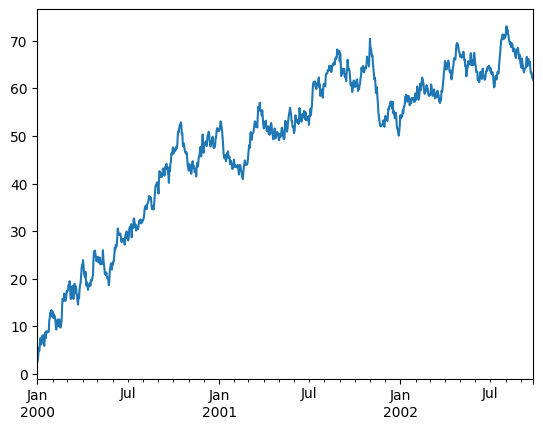

In [186]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();

In [187]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

In [189]:
df = df.cumsum()

<Figure size 640x480 with 0 Axes>

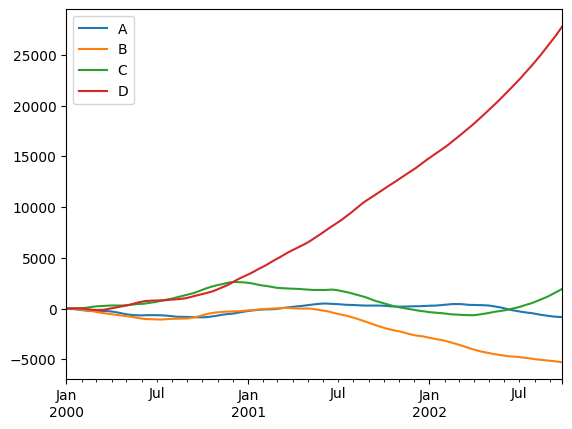

In [191]:
plt.figure();
df.plot()
plt.legend(loc='best');


# Importing and exporting data

## CSV

In [192]:
#df.to_csv("foo.csv")
#pd.read_csv("foo.csv")

## HDF5

In [193]:
#df.to_hdf('foo.h5', "df")
#pd.read_hdf('foo.h5', 'df')

# Gotchas 

If you are attempting to perform a boolean operation on a Series or DataFrame you might see an exception like:

See https://pandas.pydata.org/docs/user_guide/basics.html#basics-compare

See https://pandas.pydata.org/docs/user_guide/gotchas.html#gotchas

In [194]:
if pd.Series([False, True, False]):
     print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().